# 📝 Combine CSV Files and Perform Basic Analysis

This notebook combines two CSV files into one and performs basic exploratory data analysis (EDA) to understand the data better.

In [1]:
# Step 1: import necessary libraries
import pandas as pd

In [3]:
# Step 2: load the csv files

EnglandDataset1 = pd.read_csv(r'C:\Users\Morobang\Documents\GitHub\English Premier League & Championship Analysis\1. Data\England CSV.csv')
EnglandDataset2 = pd.read_csv(r'C:\Users\Morobang\Documents\GitHub\English Premier League & Championship Analysis\1. Data\England 2 CSV.csv')

In [4]:
# Step 3: Combine the files row-wise 
EnglandDataset = pd.concat([EnglandDataset1, EnglandDataset2], ignore_index=True)

In [5]:
# Step 4: Save the combined dataset to a new CSV file\
EnglandDataset.to_csv(r'C:\Users\Morobang\Documents\GitHub\English Premier League & Championship Analysis\1. Data\England Combined CSV.csv', index=False)

In [24]:
display(EnglandDataset.head())

# Step 6: Count the number of rows and columns
rows, columns = EnglandDataset.shape
print(f'The dataset has {rows} rows and {columns} columns.')



,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,...,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,...,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,...,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,...,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,...,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League


The dataset has 23504 rows and 25 columns.


In [23]:
from scipy import stats
import numpy as np

In [25]:
# Step 5: Remove duplicates
EnglandDataset = EnglandDataset.drop_duplicates()

rows, columns = EnglandDataset.shape
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 23504 rows and 25 columns.


In [26]:
# step 6: check for missing values
missing_values = EnglandDataset.isnull().sum()
print("Missing values in each column:" + str(missing_values))

Missing values in each column:Date                0
Season              0
HomeTeam            0
AwayTeam            0
FTH Goals           0
FTA Goals           0
FT Result           0
HTH Goals         925
HTA Goals         925
HT Result         925
Referee          3377
H Shots          2825
A Shots          2825
H SOT            2825
A SOT            2825
H Fouls          2825
A Fouls          2825
H Corners        2825
A Corners        2825
H Yellow         2825
A Yellow         2825
H Red            2825
A Red            2825
Display_Order       0
League              0
dtype: int64


In [27]:
# Step 7: Handle missing values
for column in EnglandDataset.columns:
    if EnglandDataset[column].isnull().sum() > 0:
        if EnglandDataset[column].dtype in ['float64', 'int64']:
            # Fill numeric columns with the mean
            EnglandDataset[column].fillna(EnglandDataset[column].mean(), inplace=True)
        else:
            # Fill non-numeric columns with the mode
            EnglandDataset[column].fillna(EnglandDataset[column].mode()[0], inplace=True)

# Verify no missing values remain
print("Missing values after handling:")
print(EnglandDataset.isnull().sum())

Missing values after handling:
Date             0
Season           0
HomeTeam         0
AwayTeam         0
FTH Goals        0
FTA Goals        0
FT Result        0
HTH Goals        0
HTA Goals        0
HT Result        0
Referee          0
H Shots          0
A Shots          0
H SOT            0
A SOT            0
H Fouls          0
A Fouls          0
H Corners        0
A Corners        0
H Yellow         0
A Yellow         0
H Red            0
A Red            0
Display_Order    0
League           0
dtype: int64


C:\Users\Morobang\AppData\Local\Temp\ipykernel_49728\1920148561.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  EnglandDataset[column].fillna(EnglandDataset[column].mean(), inplace=True)
C:\Users\Morobang\AppData\Local\Temp\ipykernel_49728\1920148561.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [30]:
# step 8: Check datatypes for each column
print(f"Data types of each column: {EnglandDataset.dtypes}")


Data types of each column: Date              object
Season            object
HomeTeam          object
AwayTeam          object
FTH Goals          int64
FTA Goals          int64
FT Result         object
HTH Goals        float64
HTA Goals        float64
HT Result         object
Referee           object
H Shots          float64
A Shots          float64
H SOT            float64
A SOT            float64
H Fouls          float64
A Fouls          float64
H Corners        float64
A Corners        float64
H Yellow         float64
A Yellow         float64
H Red            float64
A Red            float64
Display_Order      int64
League            object
dtype: object


In [31]:
# Step 9: Convert specific float64 columns to int64
EnglandDataset['HTH Goals'] = EnglandDataset['HTH Goals'].fillna(0).astype('int64')
EnglandDataset['HTA Goals'] = EnglandDataset['HTA Goals'].fillna(0).astype('int64')
EnglandDataset['H Shots'] = EnglandDataset['H Shots'].fillna(0).astype('int64')
EnglandDataset['A Shots'] = EnglandDataset['A Shots'].fillna(0).astype('int64')
EnglandDataset['H SOT'] = EnglandDataset['H SOT'].fillna(0).astype('int64')
EnglandDataset['A SOT'] = EnglandDataset['A SOT'].fillna(0).astype('int64')
EnglandDataset['H Fouls'] = EnglandDataset['H Fouls'].fillna(0).astype('int64')
EnglandDataset['A Fouls'] = EnglandDataset['A Fouls'].fillna(0).astype('int64')
EnglandDataset['H Corners'] = EnglandDataset['H Corners'].fillna(0).astype('int64')
EnglandDataset['A Corners'] = EnglandDataset['A Corners'].fillna(0).astype('int64')
EnglandDataset['H Yellow'] = EnglandDataset['H Yellow'].fillna(0).astype('int64')
EnglandDataset['A Yellow'] = EnglandDataset['A Yellow'].fillna(0).astype('int64')
EnglandDataset['H Red'] = EnglandDataset['H Red'].fillna(0).astype('int64')
EnglandDataset['A Red'] = EnglandDataset['A Red'].fillna(0).astype('int64')

# Verify the conversion
print("Updated data types:")
print(EnglandDataset.dtypes)

Updated data types:
Date             object
Season           object
HomeTeam         object
AwayTeam         object
FTH Goals         int64
FTA Goals         int64
FT Result        object
HTH Goals         int64
HTA Goals         int64
HT Result        object
Referee          object
H Shots           int64
A Shots           int64
H SOT             int64
A SOT             int64
H Fouls           int64
A Fouls           int64
H Corners         int64
A Corners         int64
H Yellow          int64
A Yellow          int64
H Red             int64
A Red             int64
Display_Order     int64
League           object
dtype: object


In [34]:
#Step 10: Save the cleaned dataset to a new CSV file
EnglandDataset.to_csv(r'C:\Users\Morobang\Documents\GitHub\English Premier League & Championship Analysis\1. Data\England Cleaned CSV.csv', index=False)

Exploratory Data Analysi(EDA)

In [35]:
# Step 11: Show basic statistics for numeric columns
print("Basic statistics for numeric columns:")
print(EnglandDataset.describe())

Basic statistics for numeric columns:
          FTH Goals     FTA Goals     HTH Goals     HTA Goals       H Shots  \
count  23504.000000  23504.000000  23504.000000  23504.000000  23504.000000   
mean       1.483194      1.142359      0.633424      0.478982     13.233067   
std        1.255772      1.104613      0.809665      0.704337      4.706983   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000     10.000000   
50%        1.000000      1.000000      0.000000      0.000000     13.000000   
75%        2.000000      2.000000      1.000000      1.000000     16.000000   
max        9.000000      9.000000      7.000000      5.000000     43.000000   

            A Shots         H SOT         A SOT       H Fouls      A Fouls  \
count  23504.000000  23504.000000  23504.000000  23504.000000  23504.00000   
mean      10.555012      5.531527      4.403846     11.282505     11.73179   
std        4.197

In [36]:
# Step 12: Show value counts for categorical columns
categorical_columns = EnglandDataset.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(EnglandDataset[column].value_counts())
    print("\n")

Value counts for Date:
Date
26/12/2005    22
26/12/2013    22
26/12/2014    22
31/12/2005    22
26/12/2008    22
              ..
27/08/2004     1
15/09/2004     1
22/09/2004     1
24/09/2004     1
15/10/2004     1
Name: count, Length: 4305, dtype: int64


Value counts for Season:
Season
2023/24    932
2022/23    932
2021/22    932
2020/21    932
2018/19    932
2019/20    932
2017/18    932
2016/17    932
2012/13    932
2015/16    932
2014/15    932
2013/14    932
2010/11    932
2011/12    932
2009/10    932
2008/09    932
2004/05    932
2007/08    932
2006/07    932
2005/06    932
2024/25    520
1994/95    462
1993/94    462
2003/04    380
2001/02    380
2002/03    380
2000/01    380
1999/00    380
1997/98    380
1998/99    380
1995/96    380
1996/97    380
Name: count, dtype: int64


Value counts for HomeTeam:
HomeTeam
Aston Villa               616
Newcastle                 611
Leeds                     605
Tottenham                 604
Man United                604
                 

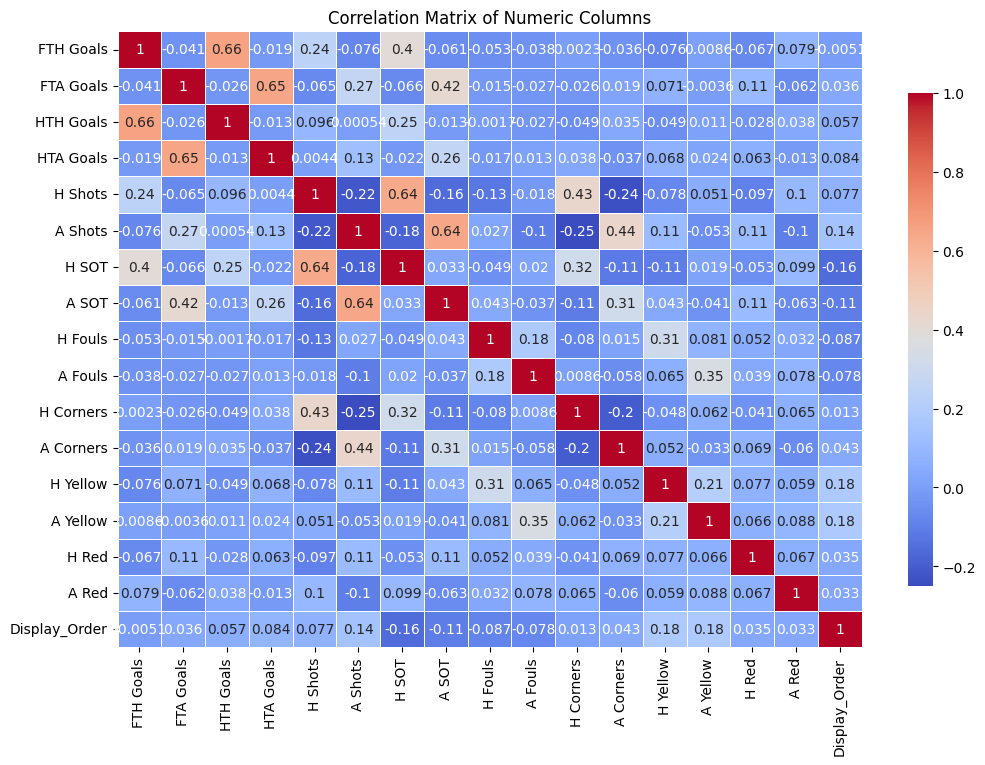

In [39]:
# Step 13: Show correlation matrix for numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = EnglandDataset.select_dtypes(include=['int64', 'float64'])

# Create the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

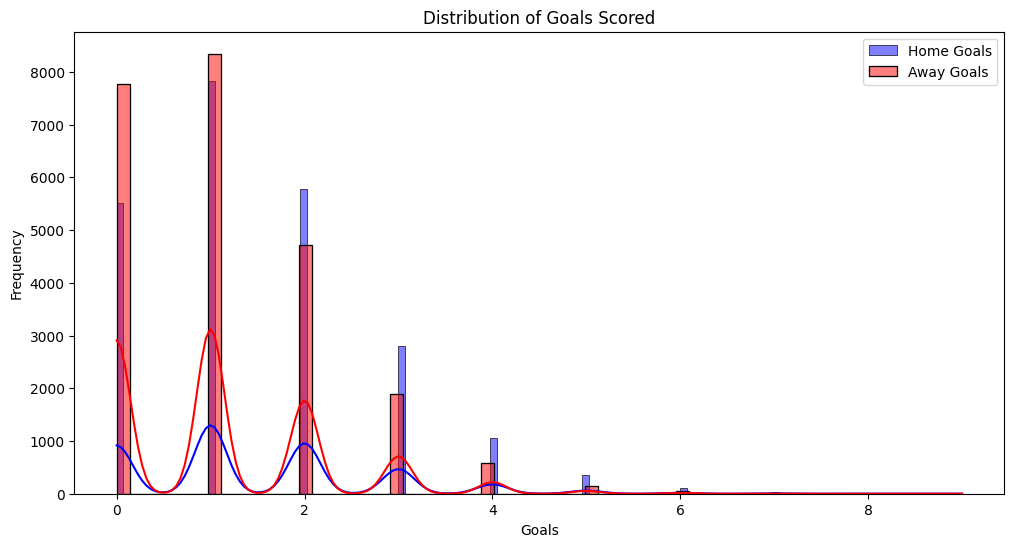

In [40]:
# Step 14: Plot distribution of goals scored by home and away teams
plt.figure(figsize=(12, 6))
sns.histplot(EnglandDataset['FTH Goals'], kde=True, color='blue', label='Home Goals')
sns.histplot(EnglandDataset['FTA Goals'], kde=True, color='red', label='Away Goals')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\Morobang\AppData\Local\Temp\ipykernel_49728\3915000545.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  EnglandDataset['Date'] = pd.to_datetime(EnglandDataset['Date'], errors='coerce')


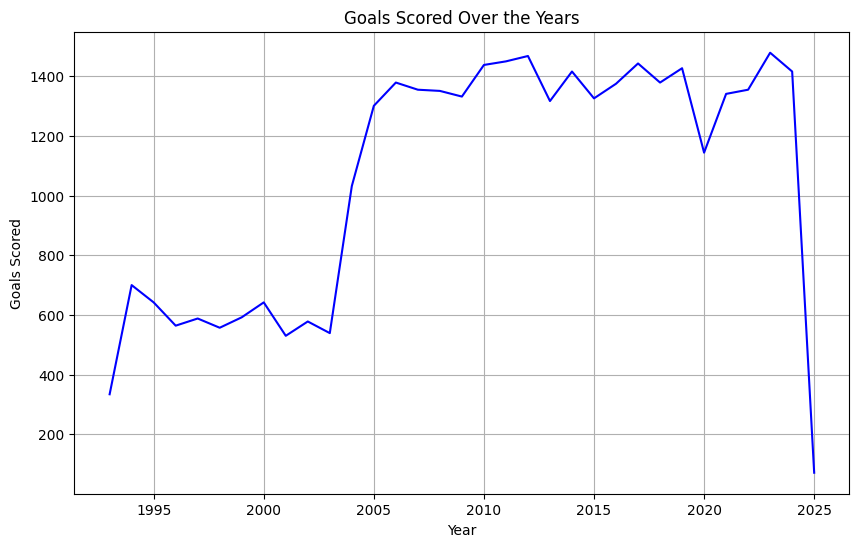

In [42]:
# step 15: plot goals scored over the years
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the Date column is in datetime format
EnglandDataset['Date'] = pd.to_datetime(EnglandDataset['Date'], errors='coerce')

# Now plot goals scored over the years
plt.figure(figsize=(10, 6))
EnglandDataset.groupby(EnglandDataset['Date'].dt.year)['FTH Goals'].sum().plot(kind='line', color='b')
plt.title('Goals Scored Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()